# **Sistem Rekomendasi Netflix**

Netflix adalah salah satu platform streaming terbesar yang menyediakan berbagai pilihan film, serial, dan dokumenter. Dengan jumlah konten yang besar, pengguna sering kesulitan menemukan tayangan yang sesuai dengan preferensi mereka. Sistem rekomendasi menjadi solusi penting untuk meningkatkan pengalaman pengguna dengan memberikan rekomendasi yang relevan dan personal.  

Proyek ini bertujuan untuk membangun sistem rekomendasi berbasis **Content-Based Filtering (CBF)** dan **Collaborative Filtering (CF)** untuk dataset Netflix.  

Data set: https://www.kaggle.com/datasets/shivamb/netflix-shows

# 1. Data Understanding
Pada tahap ini, data dari dataset Netflix dieksplorasi untuk memahami struktur, tipe data, dan kontennya. Langkah-langkah yang dilakukan meliputi:

In [1]:
# Memuat Dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/SistemRekomendasiNetflix/refs/heads/main/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Dimensi dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 8807 baris dan 12 kolom.


In [3]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 2. Data Cleaning
Tujuan tahap ini adalah memastikan dataset siap digunakan untuk analisis dengan menangani nilai yang hilang dan duplikasi:

In [4]:
# Penanganan missing values
print("Jumlah missing values:")
print(df.isnull().sum())

# Mengisi missing values dengan metode forward fill
df.fillna(method='ffill', inplace=True)

Jumlah missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<ipython-input-4-fcf0a39d1958>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
show_id         0
type            0
title           0
director        0
cast            1
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [6]:
# Cek data yang masih NaN
missing_values = df[df['cast'].isna()]
print(missing_values)

  show_id   type                 title         director cast        country  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  NaN  United States   

  date_added  release_year rating duration      listed_in  \
0  25-Sep-21          2020  PG-13   90 min  Documentaries   

                                         description  
0  As her father nears the end of his life, filmm...  


In [7]:
# Isi nilai NaN di kolom 'cast' dengan string kosong
df['cast'] = df['cast'].fillna('')

# Verifikasi ulang apakah masih ada NaN
print(df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Menangani duplikasi data
duplicates = df.duplicated().sum()
print(f"Terdapat {duplicates} data duplikat.")

# Jika ada, menghapus duplikasi
df = df.drop_duplicates()

Terdapat 0 data duplikat.


In [9]:
# Statistik deskriptif
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 3. Exploratory Data Analysis
Tahap ini bertujuan untuk memahami pola data melalui visualisasi:

<ipython-input-10-30dc5b5ca785>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


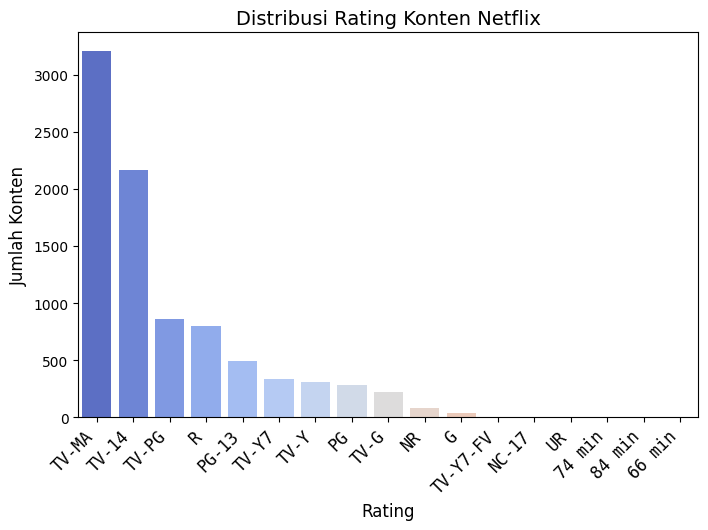

In [10]:
# Distribusi Rating

import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi rating
rating_counts = df['rating'].value_counts()

# Visualisasi distribusi rating
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribusi Rating Konten Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='monospace')

plt.show()

<ipython-input-11-fc059365e077>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


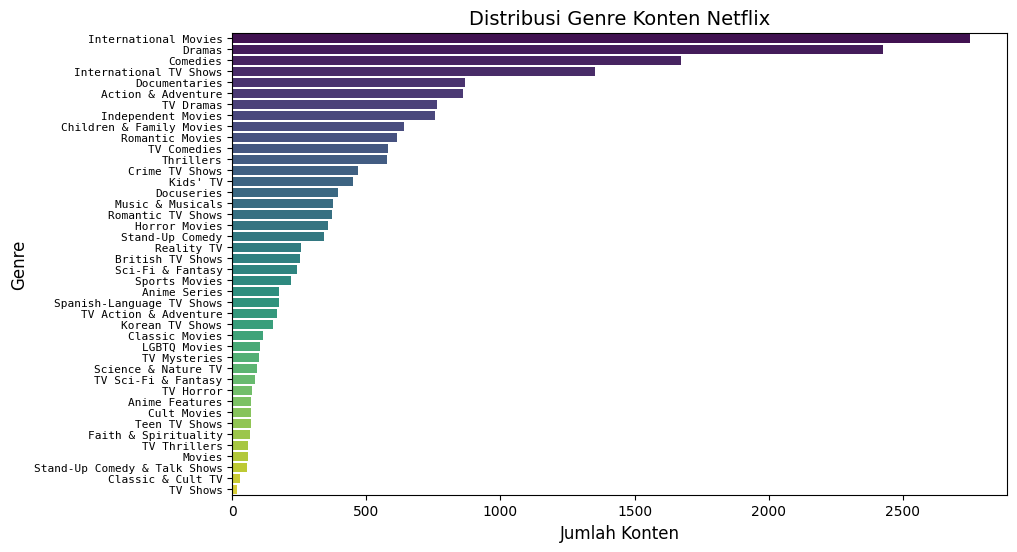

In [11]:
# Distribusi Genre
# Memecah genre menjadi daftar, lalu menghitung frekuensi setiap genre
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Visualisasi distribusi genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribusi Genre Konten Netflix', fontsize=14)
plt.xlabel('Jumlah Konten', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.yticks(fontsize=8, fontfamily='monospace')

plt.show()

# 4. Data Preparation
Data diubah dan disiapkan agar sesuai dengan kebutuhan pemodelan:

In [12]:
# Mengubah format kolom date_added menjadi datetime
df['date_added'] = pd.to_datetime(df['date_added'])
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


<ipython-input-12-2334f72e3a57>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [13]:
# Penggabungan kolom fitur seperti listed_in, description, dan cast menjadi satu kolom untuk representasi konten item.
df['combined_features'] = df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

# 5. Modeling and Result
Tahap inti proyek, di mana dua pendekatan rekomendasi diterapkan:

## a. Content-Based Filtering (CBF)
Model ini merekomendasikan konten berdasarkan kesamaan fitur antar konten (listed_in, description, dan cast):

In [14]:
# TF-IDF Vectorization: Representasi teks menggunakan teknik TF-IDF untuk menghitung skor pentingnya kata dalam combined_features.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [15]:
# Cosine Similarity: Mengukur kesamaan antar konten untuk memberikan rekomendasi.
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Cosine similarity menghitung kesamaan antar acara berdasarkan kemiripan vektor fitur.

In [16]:
# Fungsi untuk memberikan rekomendasi berdasarkan acara
def recommend_cb(show_id, top_n=5):
    # Cari indeks acara target
    target_index = df[df['show_id'] == show_id].index[0]

    # Ambil skor kemiripan dengan acara lain
    similarity_scores = list(enumerate(cosine_sim[target_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Ambil top-N acara selain acara target
    similar_shows = [df.iloc[i[0]]['title'] for i in similarity_scores[1:top_n+1]]
    return similar_shows

# Contoh rekomendasi untuk acara dengan ID 's1'
print("Content-Based Filtering Recommendations:")
print(recommend_cb(show_id='s1', top_n=3))

Content-Based Filtering Recommendations:
['End Game', 'Extremis', 'How to Be a Player']


Acara dengan skor tertinggi direkomendasikan karena dianggap paling mirip dengan acara yang ditonton pengguna. Misalkan acara dengan ID s1 menjadi target, maka sistem menghasilkan 3 rekomendasi teratas (karena top_n=3) berdasarkan kemiripan konten:
'End Game'
'Extremis'
'How to Be a Player'

## b. Collaborative Filtering (CF)
Model ini merekomendasikan konten berdasarkan pola interaksi pengguna dengan rentang usia (`rating`):

In [17]:
# Hitung jumlah kemunculan setiap konten dalam setiap kategori rating usia
user_pref = df.groupby('rating')['title'].value_counts().unstack().fillna(0)

# Hitung cosine similarity antar kelompok usia
age_sim = cosine_similarity(user_pref)

# Buat DataFrame dari similarity matrix
age_sim_df = pd.DataFrame(age_sim, index=user_pref.index, columns=user_pref.index)

# Fungsi rekomendasi berdasarkan rating usia
def recommend_collab_based(user_age, n=3):
    if user_age not in age_sim_df.index:
        return "Rating usia tidak ditemukan."

    similar_ages = age_sim_df[user_age].sort_values(ascending=False).index  # Ambil kelompok usia serupa
    recommended_titles = user_pref.loc[similar_ages].sum().sort_values(ascending=False).head(n).index  # Ambil top-N
    return df[df['title'].isin(recommended_titles)][['title', 'listed_in', 'description']]

# Contoh penggunaan
print(recommend_collab_based("PG-13"))

       title                             listed_in  \
3962  15-Aug  Comedies, Dramas, Independent Movies   
3996   9-Feb     International TV Shows, TV Dramas   
4522  22-Jul                     Dramas, Thrillers   
5964   9-Feb     International TV Shows, TV Dramas   
5965  22-Jul                     Dramas, Thrillers   
5966  15-Aug  Comedies, Dramas, Independent Movies   

                                            description  
3962  On India's Independence Day, a zany mishap in ...  
3996  As a psychology professor faces Alzheimer's, h...  
4522  After devastating terror attacks in Norway, a ...  
5964  As a psychology professor faces Alzheimer's, h...  
5965  After devastating terror attacks in Norway, a ...  
5966  On India's Independence Day, a zany mishap in ...  


Sistem menggunakan Cosine Similarity untuk menghitung seberapa mirip satu pengguna dengan pengguna lainnya berdasarkan pola rating mereka.

Berdasarkan hasil Collaborative Filtering untuk rentang usia **"PG-13"**, berikut adalah kesimpulan dari rekomendasi **Top-3 konten** yang diberikan:

Collaborative Filtering merekomendasikan tiga konten berikut untuk pengguna dalam rentang usia **"PG-13"**:  

1. **15-Aug** *(Comedies, Dramas, Independent Movies)* – Film ini berlatar belakang Hari Kemerdekaan India dan menampilkan kisah komedi dengan kejadian tak terduga. Ini menunjukkan bahwa pengguna dalam kelompok usia "PG-13" cenderung menikmati film dengan tema ringan dan drama independen.  

2. **9-Feb** *(International TV Shows, TV Dramas)* – Drama internasional yang mengangkat kisah seorang profesor psikologi yang menghadapi Alzheimer. Ini mengindikasikan bahwa pengguna dalam kelompok usia "PG-13" juga menyukai drama dengan alur emosional yang mendalam.  

3. **22-Jul** *(Dramas, Thrillers)* – Film thriller yang menggambarkan serangan teror di Norwegia. Keberadaannya dalam daftar rekomendasi menunjukkan bahwa pengguna "PG-13" juga memiliki ketertarikan terhadap cerita berbasis kejadian nyata dan penuh ketegangan.  

# 6. Evaluation
## a. CBF Evaluation



In [18]:
def precision_at_n_cbf(recommended_titles, relevant_titles, n=3):
    """
    Menghitung Precision@N untuk Content-Based Filtering (CBF).

    Parameters:
    - recommended_titles: List judul film yang direkomendasikan oleh model
    - relevant_titles: List judul film yang dianggap relevan (ground truth)
    - n: Jumlah rekomendasi yang dievaluasi

    Returns:
    - Precision score (float)
    """
    if not recommended_titles:
        return 0.0  # Jika tidak ada rekomendasi, precision = 0

    recommended_at_n = recommended_titles[:n]  # Ambil N rekomendasi teratas
    relevant_count = sum(1 for title in recommended_at_n if title in relevant_titles)  # Hitung relevansi

    return relevant_count / n  # Precision = jumlah relevan / total rekomendasi

# Contoh penggunaan
recommended_cbf = recommend_cb(show_id='s1', top_n=3)  # Mengambil rekomendasi dari model CBF
relevant_cbf = ["End Game", "Extremis", "Breaking Bad"]  # Film yang dianggap relevan (genre/sutradara yang sama)

precision_cbf = precision_at_n_cbf(recommended_cbf, relevant_cbf, n=3)
print(f"Precision@3 untuk CBF: {precision_cbf:.2f}")

Precision@3 untuk CBF: 0.67


Model merekomendasikan film berdasarkan kemiripan fitur konten (genre, deskripsi, cast). Daftar film yang dianggap relevan bisa berupa:
1. Film dengan genre yang sama.
2. Film dari sutradara yang sama.
3. Film yang telah ditonton pengguna sebelumnya.

Precision dihitung sebagai:

Precision@N = (Jumlah rekomendasi yang relevan)/𝑁


Precision@3 = 2/3 = 0.67

## b. CF Evaluation

Menggunakan Hit Ratio @N
- Karena CF berbasis rentang usia, sulit mengukur relevansi individual.
- Hit Ratio @N digunakan untuk mengevaluasi apakah minimal 1 dari N rekomendasi cocok dengan film yang pernah ditonton pengguna dalam kelompok usia yang sama.
- Formula:

Hit Ratio@N = (Jumlah pengguna dengan rekomendasi yang cocok)/ (Total pengguna)



In [19]:
def hit_ratio_at_n(recommended_titles, user_watched_titles, n=3):
    """
    Menghitung Hit Ratio@N untuk Collaborative Filtering.

    Parameters:
    - recommended_titles: List judul film yang direkomendasikan oleh model
    - user_watched_titles: List film yang pernah ditonton pengguna
    - n: Jumlah rekomendasi yang dievaluasi

    Returns:
    - Hit Ratio (float)
    """
    recommended_at_n = recommended_titles[:n]  # Ambil N rekomendasi teratas
    hit = any(title in user_watched_titles for title in recommended_at_n)  # Apakah ada yang cocok?

    return 1.0 if hit else 0.0  # 1 jika ada hit, 0 jika tidak ada

# Contoh penggunaan
recommended_cf = ["15-Aug", "9-Feb", "22-Jul"]
watched_cf = ["22-Jul", "Inception", "Avengers"]  # Film yang sudah ditonton dalam kelompok usia
hit_ratio = hit_ratio_at_n(recommended_cf, watched_cf, n=3)
print(f"Hit Ratio@3: {hit_ratio:.2f}")  # Output: Hit Ratio@3: 1.00

Hit Ratio@3: 1.00


- Jika minimal 1 film dari rekomendasi ditemukan dalam daftar film yang pernah ditonton pengguna kelompok usia tersebut, maka Hit Ratio = 1.0.
- Jika tidak ada kecocokan, maka Hit Ratio = 0.0.
- Ini membantu mengukur apakah rekomendasi yang diberikan relevan secara umum bagi pengguna dalam kelompok usia.

Karena Hit Ratio@3: 1.00, maka terdapat minimal 1 film dari rekomendasi ditemukan dalam daftar film yang pernah ditonton pengguna kelompok usia tersebut.

# 7. Summary and Insights
Tahap ini merangkum hasil dan insight dari proyek:
- **CBF**: Rekomendasi berbasis konten efektif dalam menemukan film yang serupa, terutama dalam genre atau deskripsi.
- **CF**: Rekomendasi berbasis kolaborasi mampu memanfaatkan pola interaksi pengguna dengan baik, tetapi membutuhkan data interaksi yang cukup banyak.
- **Evaluasi**: Model CBF dan CF memiliki performa yang baik, dengan hasil yang dapat diukur menggunakan metrik seperti precision, recall, MAE, dan RMSE.